# **Project Name**    - **Heart Failure Predictor**



# **Problem Statement -**

Cardiovascular diseases (CVDs) are the leading cause of death globally, responsible for approximately 17.9 million deaths annually, which constitutes 31% of all deaths worldwide. Notably, four out of five CVD deaths result from heart attacks and strokes, with one-third of these deaths occurring prematurely in individuals under the age of 70. Heart failure, a common consequence of CVDs, poses a significant health risk, especially to those with pre-existing conditions such as hypertension, diabetes, and hyperlipidemia.

Given the critical need for early detection and effective management of cardiovascular diseases, this project aims to develop a machine learning model to predict the likelihood of heart disease in individuals. By analyzing various risk factors, including medical history, lifestyle choices, and biometric data, the model seeks to identify individuals at high cardiovascular risk. The goal is to facilitate timely intervention and personalized treatment plans, thereby reducing the incidence of heart attacks, strokes, and heart failure, ultimately saving lives and improving quality of life.

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

### Dataset Loading

In [ ]:
# Load Dataset

df0 = pd.read_csv('https://github.com/ROHAN010501/data/raw/main/heart.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df = df0.copy()
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

df.shape

(918, 12)

### Dataset Information

In [ ]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

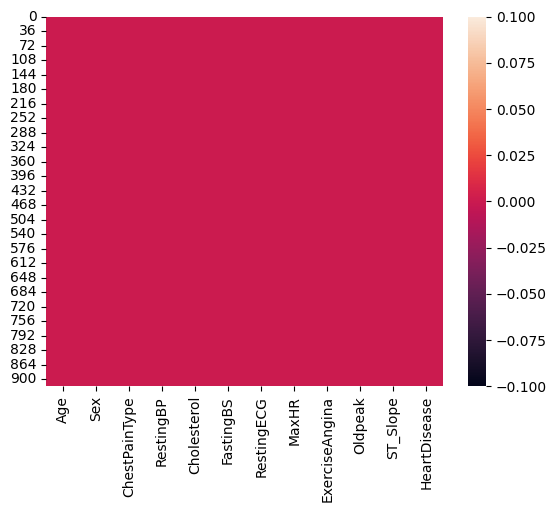

In [ ]:
# Visualizing the missing values

sns.heatmap(df.isnull())

In [ ]:
# Dataset Columns

df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Variables Description

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# creating a numerical dataframe

numerical_df = df.select_dtypes(include=np.number)
numerical_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [ ]:
# creating a categorical dataframe

categorical_df = df.select_dtypes(include=object)
categorical_df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


#### Chart - 1   Age histplot (Univariate)

   Age  count
0   54     51
1   58     42
2   55     41
3   56     38
4   57     38


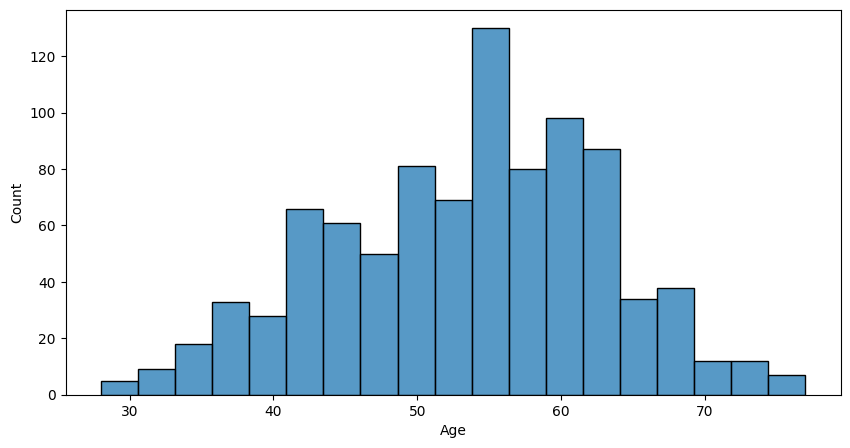

In [ ]:
# Chart - 1 visualization code

print(df['Age'].value_counts().reset_index().head())

# the histplot is used to understand the distribution of contionus variable
plt.figure(figsize=(10,5))
sns.histplot(x='Age',data=df)
plt.show()


#### Chart - 2  HeartDisease pie (Univariate)

   HeartDisease  count
0             1    508
1             0    410


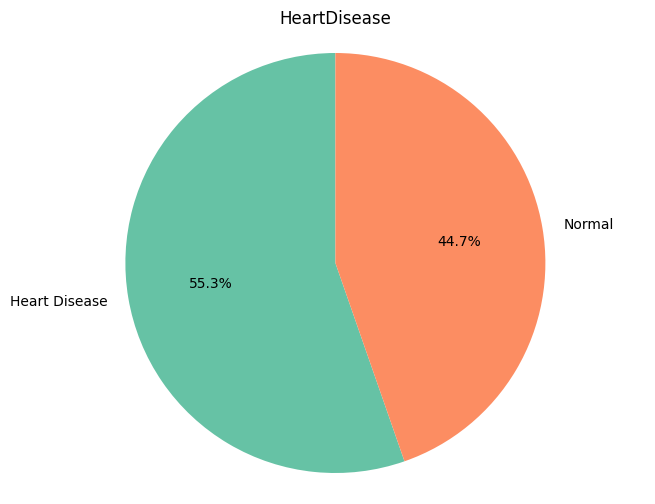

In [ ]:
# Chart - 2 visualization code

print(df['HeartDisease'].value_counts().reset_index())

# the pie chart is used to visualize the distribution of whole

plt.figure(figsize=(8,6))
plt.title('HeartDisease')
plt.pie(df['HeartDisease'].value_counts(), startangle=90, labels=['Heart Disease','Normal'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.show()


#### Chart - 3  Gender pie (Univariate)

  Sex  count
0   M    725
1   F    193


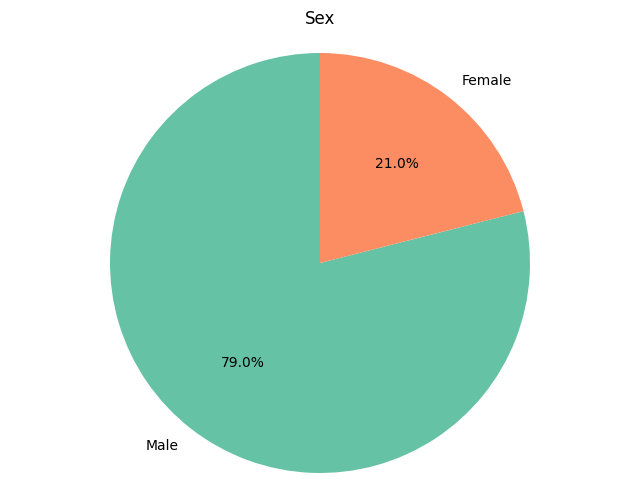

In [ ]:
# Chart - 3 visualization code

print(df['Sex'].value_counts().reset_index())

# the pie chart is used to visualize the distribution of whole
plt.figure(figsize=(8,6))
plt.title('Sex')
plt.pie(df['Sex'].value_counts(), startangle=90, labels=['Male','Female'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.show()

#### Chart - 4   RestingBP Histogram(Univariate)

    RestingBP  count
0         120    132
1         130    118
2         140    107
3         110     58
4         150     55
..        ...    ...
62        185      1
63         98      1
64         92      1
65        113      1
66        164      1

[67 rows x 2 columns]


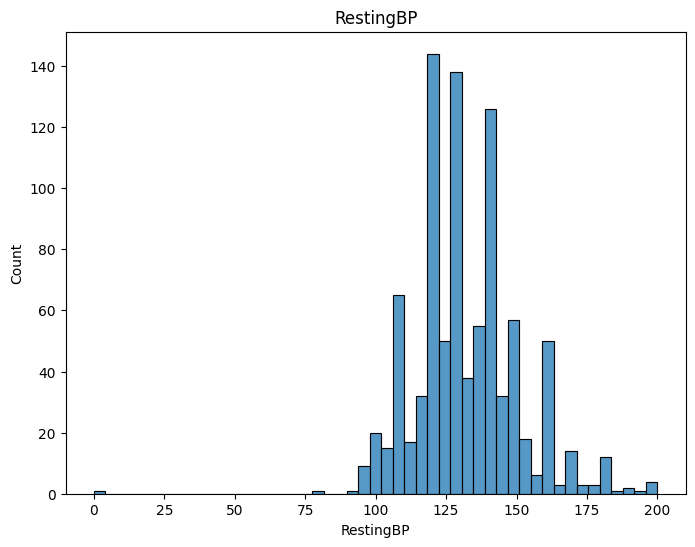

In [ ]:
# Chart - 4 visualization code

print(df['RestingBP'].value_counts().reset_index())

# the pie chart is used to visualize the distribution of whole
plt.figure(figsize=(8,6))
sns.histplot(x='RestingBP',data=df)
plt.title('RestingBP')
plt.show()

#### Chart - 5 Cholesterol histplot (Univariate)

     Cholesterol  count
0              0    172
1            254     11
2            223     10
3            220     10
4            230      9
..           ...    ...
217          392      1
218          316      1
219          153      1
220          466      1
221          131      1

[222 rows x 2 columns]


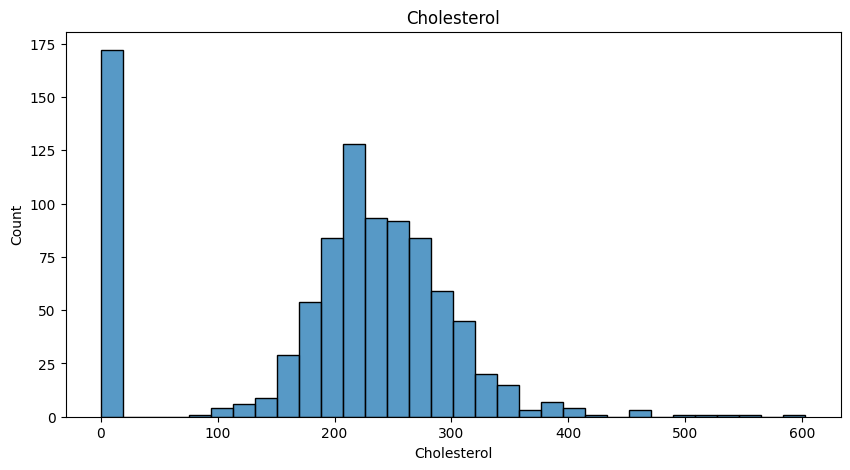

In [ ]:
# Chart - 5 visualization code

print(df['Cholesterol'].value_counts().reset_index())

# the histplot is used to understand the distribution of contionus variable
plt.figure(figsize=(10,5))
plt.title('Cholesterol')
sns.histplot(x='Cholesterol',data=df)
plt.show()

#### Chart - 6 MaxHR histplot

     MaxHR  count
0      150     43
1      140     41
2      120     36
3      130     33
4      160     25
..     ...    ...
114     63      1
115     83      1
116     60      1
117     78      1
118    202      1

[119 rows x 2 columns]


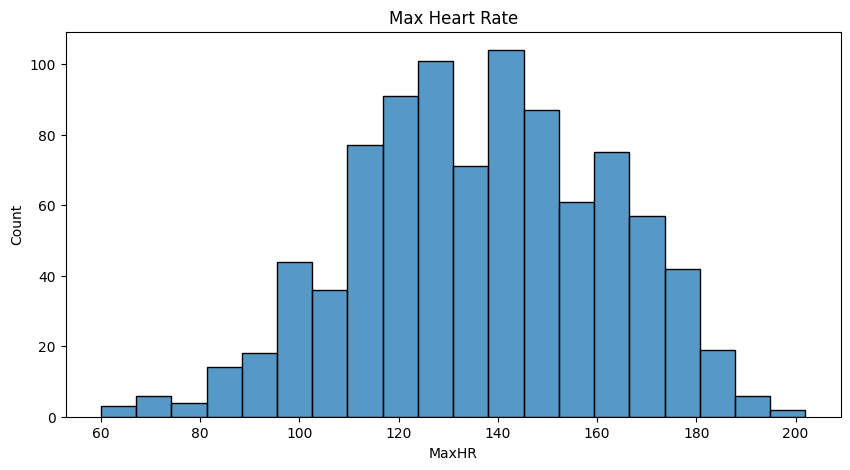

In [ ]:
# Chart - 6 visualization code

print(df['MaxHR'].value_counts().reset_index())

# the histplot is used to understand the distribution of contionus variable
plt.figure(figsize=(10,5))
plt.title('Max Heart Rate')
sns.histplot(x='MaxHR',data=df)
plt.show()

#### Chart - 7  Fasting Blood Sugar pie (Univariate)

   FastingBS  count
0          0    704
1          1    214


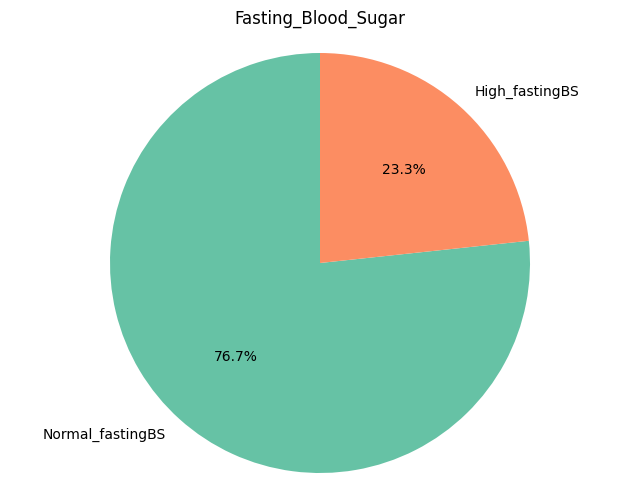

In [ ]:
# Chart - 7 visualization code

print(df['FastingBS'].value_counts().reset_index())

# the pie chart is used to visualize the distribution of whole
plt.figure(figsize=(8,6))
plt.title('Fasting_Blood_Sugar')
plt.pie(df['FastingBS'].value_counts(), startangle=90, labels=['Normal_fastingBS','High_fastingBS'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.show()

#### Chart - 8  Oldpeak Histplot (Univariate)

   Oldpeak  count
0      0.0    368
1      1.0     86
2      2.0     76
3      1.5     53
4      3.0     28


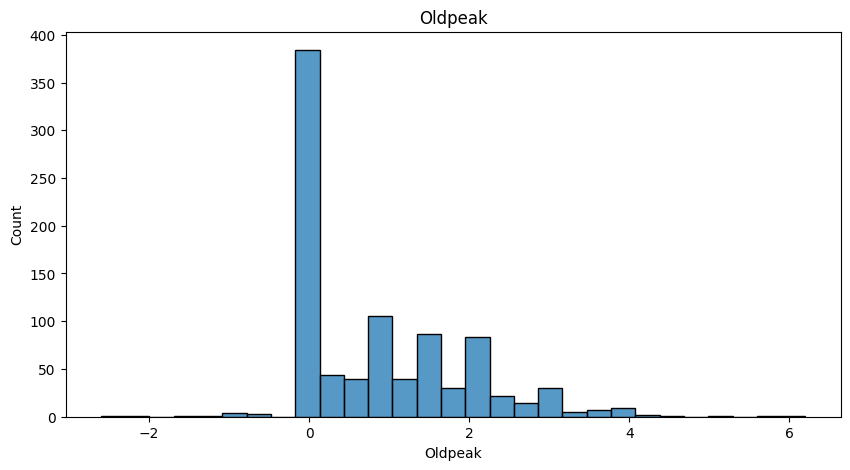

In [ ]:
# Chart - 8 visualization code

print(df['Oldpeak'].value_counts().reset_index().head())

# the histplot  is used to visualize the distribution of whole
plt.figure(figsize=(10,5))
plt.title('Oldpeak')
sns.histplot(x='Oldpeak',data=df)
plt.show()

#### Chart - 9 ChestPainType barplot (Bivariate)

  ChestPainType  count
0           ASY    496
1           NAP    203
2           ATA    173
3            TA     46


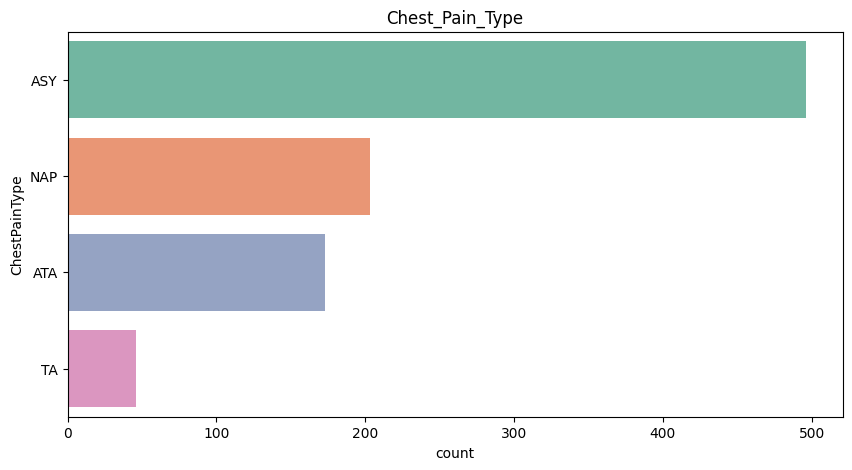

In [ ]:
# Chart - 9 visualization code

ChestPainType = df['ChestPainType'].value_counts().reset_index()
print(ChestPainType)

# the barplot is used to visualize the distribution of categorical variable
plt.figure(figsize=(10,5))
plt.title('Chest_Pain_Type')
sns.barplot(y='ChestPainType',x='count',data=ChestPainType, palette='Set2')
plt.show()

#### Chart - 10 RestingECG Barplot (Bivariate)

  RestingECG  count
0     Normal    552
1        LVH    188
2         ST    178


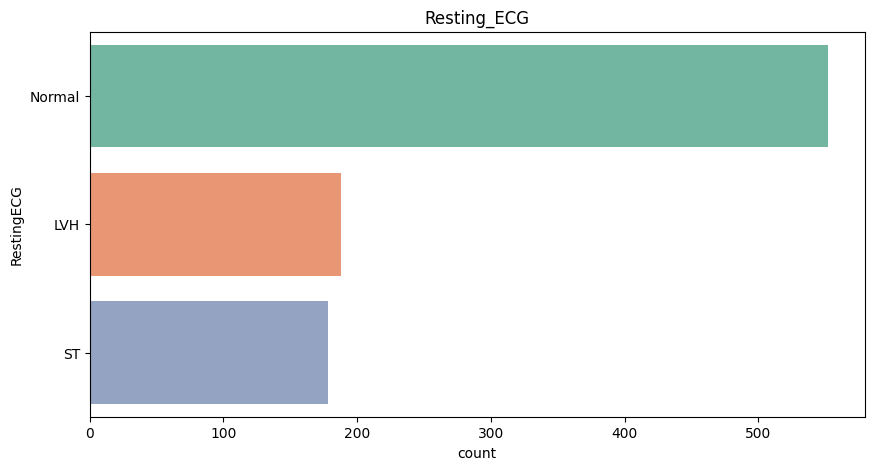

In [ ]:
# Chart - 10 visualization code

RestingECG = df['RestingECG'].value_counts().reset_index()
print(RestingECG)

# the barplot is used to visualize the distribution of categorical variable
plt.figure(figsize=(10,5))
plt.title('Resting_ECG')
sns.barplot(y='RestingECG',x='count',data=RestingECG, palette='Set2')
plt.show()

#### Chart - 11 ST_Slope Barplot (Bivariate)

  ST_Slope  count
0     Flat    460
1       Up    395
2     Down     63


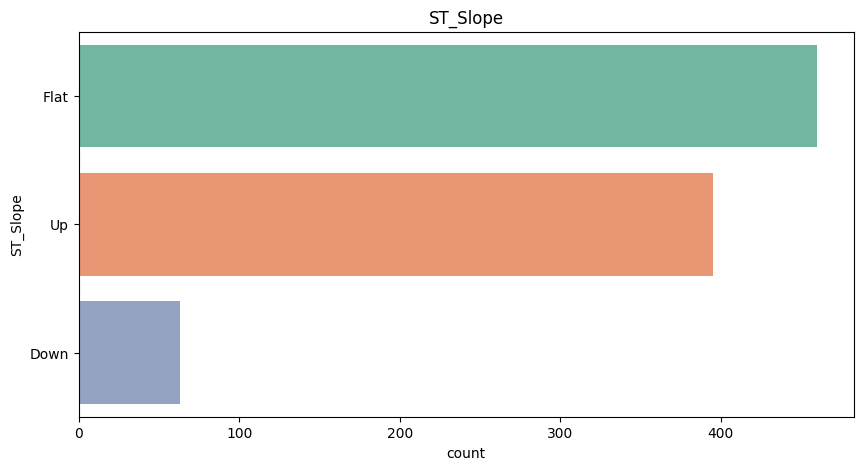

In [ ]:
# Chart - 11 visualization code

ST_Slope = df['ST_Slope'].value_counts().reset_index()
print(ST_Slope)

# the barplot is used to visualize the distribution of categorical variable
plt.figure(figsize=(10,5))
plt.title('ST_Slope')
sns.barplot(y='ST_Slope',x='count',data=ST_Slope, palette='Set2')
plt.show()

#### Chart - 12 - Correlation Heatmap

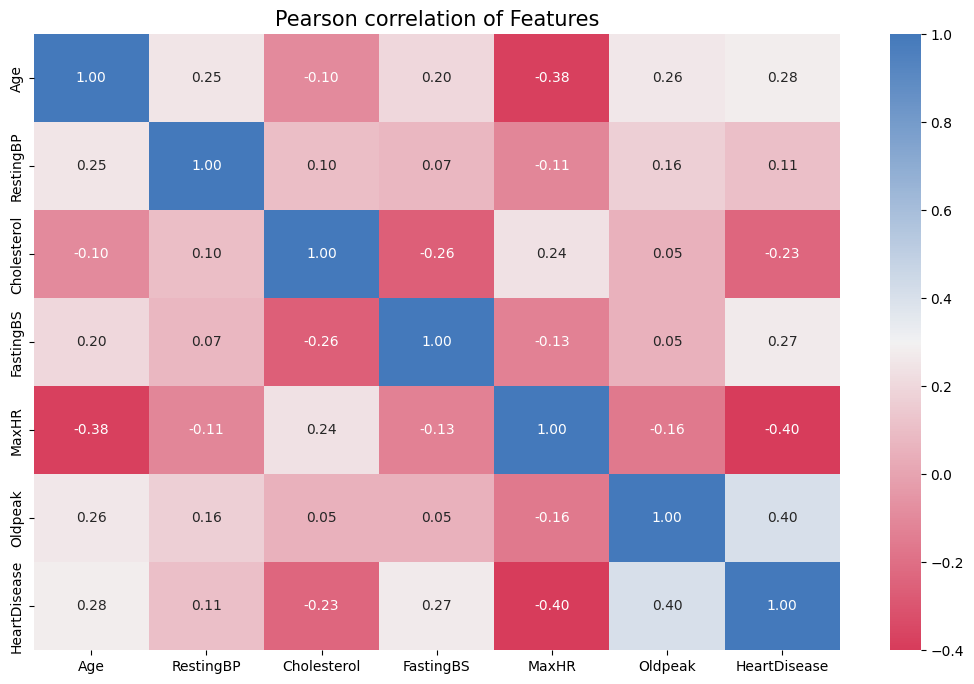

In [ ]:
# Correlation Heatmap visualization code

 # plotting correalation heatmap
corr = numerical_df.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)
plt.figure(figsize=(13, 8))
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f")
plt.title('Pearson correlation of Features',fontsize=15)
plt.show()


#### Chart - 13 - Pair Plot

In [ ]:
# Pair Plot visualization code
# Commenting this code takes forever to run
sns.pairplot(df,hue='HeartDisease')
plt.show()

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

# using boxplot to check for outliers

for col in numerical_df.columns:
    sns.boxplot(numerical_df[col])
    plt.title(col)
    plt.show()

In [ ]:
# As this is Heart disease Prediction there can be some outliers but we can't remove as they have
#important information and some outlier can be possible but we can remove and replace the impossible Values like '0'

#we are droping rows where RestingBP=0 as these are relatively less
df["RestingBP"].replace(0,np.nan,inplace=True)
df.dropna(subset='RestingBP',inplace=True)

#we are replacing Cholesterol with mean
df["Cholesterol"].replace(0,np.nan,inplace=True)
df["Cholesterol"].fillna(df["Cholesterol"].mean(),inplace=True)



### Categorical Encoding

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
# Encode your categorical columns

#labelencoding for ExerciseAngina
le = LabelEncoder()
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])

df['ExerciseAngina'].value_counts()

In [ ]:
#encoding categorical variables

df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope'])


In [ ]:
df.head()

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#Contain all independent variables
x = df.drop(['HeartDisease'], axis=1)

#Contain Dependent variable
y = df['HeartDisease']

In [ ]:
x.shape

#### 2. Feature Selection

In [ ]:
#plottibg pearson correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
#Implementation ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 100,criterion ='entropy', max_features = 4)

# Training the model
extra_tree_forest.fit(x, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

In [ ]:
# Normalizing the individual importances
feature_importance_normalized = np.std( [ tree.feature_importances_ for tree in extra_tree_forest.estimators_ ] , axis = 0)


In [ ]:

# Plotting a Bar Graph to compare the model
feature_data = pd.DataFrame({'feature_importance':feature_importance_normalized, 'feature':x.columns})

plt.figure(figsize=(12,6))
sns.barplot(x='feature_importance', y='feature', data=feature_data, color='grey')
plt.title('Feature Importance')
plt.show()

In [ ]:
print(feature_data.sort_values(by='feature_importance', ascending=False))

In [ ]:
# Dropping less important features
df.drop(columns=['ST_Slope_Down', 'ChestPainType_TA', 'RestingECG_ST', 'RestingECG_Normal', 'RestingECG_LVH'],inplace=True)

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix', fontsize=20)
plt.tight_layout()
plt.show()


###  Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

#contains all independent variables
X = df.drop(['HeartDisease'], axis=1)

#contains dependent variable
y = df['HeartDisease']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(f"X train Shape: {X_train.shape}")
print(f"X test Shape: {X_test.shape}")
print(f"y train Shape: {y_train.shape}")
print(f"y test Shape: {y_test.shape}")

### 4. Handling Imbalanced Dataset

In [ ]:
responses = df['HeartDisease'].value_counts().reset_index()
print(responses)

# Distribution of dependent variable using pie
plt.figure(figsize=(10, 6))
plt.pie(responses['count'], labels=responses['HeartDisease'], autopct='%1.1f%%', colors=sns.color_palette('Set2')[1::-1])
plt.title('HeartDisease Distribution')
plt.axis('equal')
plt.show()


In [ ]:
# to handle the imbalanced data i'll use smote(Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

#### 5. Data Scaling

In [ ]:
# Scaling your data
# using Standardscaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ML Model - 1 Implementing Logistic Regression

In [ ]:
# ML Model - 1 Implementation
model = LogisticRegression(max_iter=10000)

# Fit the Algorithm
model.fit(X_train, y_train)

# Predict on the model class
train_pred_log = model.predict(X_train)
test_pred_log = model.predict(X_test)

In [ ]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, train_pred_log))

roc_auc_score_train = roc_auc_score(y_train, train_pred_log)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, test_pred_log))

roc_auc_score_test = roc_auc_score(y_test, test_pred_log)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# commentincg this code as it takes so much time but will be using the best parameters given by this gridsearch model
'''model = LogisticRegression(max_iter=10000)

# Define the parameter grid
param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
'penalty' : ['l1','l2'],
'C' : [ 0.1, 0.01,0.001]}


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))'''
# Predict on the model

# Get the predicted classes
best_params_log = {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
grid_result = LogisticRegression(**best_params_log)
grid_result.fit(X_train, y_train)
grid_train_log_preds = grid_result.predict(X_train)
grid_test_log_preds = grid_result.predict(X_test)


In [ ]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, grid_train_log_preds))

roc_auc_score_train = roc_auc_score(y_train, grid_train_log_preds)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
# Use the test set predictions instead of training set predictions
print(classification_report(y_test, grid_test_log_preds))

roc_auc_score_test = roc_auc_score(y_test, grid_test_log_preds)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

So in our Model 1 which is Logistic Regression after Hyper-Parameter Tuning the Precision is 89% (increased by 1%), Recall is 90% (increased by 2%), f1-score is 90% (increased by 2%), accuracy is 90% (increased by 1%) and ROC AUC Score 90% (increased by 2%).
So These results demonstrate that hyper-parameter tuning led to better model performance.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
# Create an instance of the XGBClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_preds_xg = xg_models.predict(X_train)
test_preds_xg = xg_models.predict(X_test)

In [ ]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, train_preds_xg))

roc_auc_score_train = roc_auc_score(y_train, train_preds_xg)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, test_preds_xg))

roc_auc_score_test = roc_auc_score(y_test, test_preds_xg)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the parameter grid

#commenting this code because this code requires so mucch time to run insted we are directly using the best parameters
'''param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'reg_lambda': [1, 1.5, 2],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}
# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict on the model
train_preds = grid_search.predict(X_train)
test_preds = grid_search.predict(X_test)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

#these are the best parameters
#Best Parameters: {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'reg_lambda': 2, 'subsample': 0.8}
Best Score: 0.892118849216655'''

#we will use these hyper-parameters in XGBClassifier
best_params_xg = {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'reg_lambda': 2, 'subsample': 0.8}
xg_model = XGBClassifier(**best_params_xg)

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_preds_xg_gr = xg_models.predict(X_train)
test_preds_xg_gr = xg_models.predict(X_test)

In [ ]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, train_preds_xg_gr))

roc_auc_score_train = roc_auc_score(y_train, train_preds_xg_gr)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, test_preds_xg_gr))

roc_auc_score_test = roc_auc_score(y_test, test_preds_xg_gr)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

So in our Model 2 which is XGBClassfier after Hyper-Parameter Tuning the Precision is 88% (increased by 4%), Recall is 88% (increased by 4%), f1-score is 88% (increased by 4%), accuracy is 89% (increased by 5%) and ROC AUC Score 88% (increased by 4%).
So These results demonstrate that hyper-parameter tuning led to better model performance.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_preds_rf = rf_model.predict(X_train)
test_preds_rf = rf_model.predict(X_test)

In [ ]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, train_preds_rf))

roc_auc_score_train = roc_auc_score(y_train, train_preds_rf)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, test_preds_rf))

roc_auc_score_test = roc_auc_score(y_test, test_preds_rf)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# commenting this code as takes too much time to execute but we will use the best parameters estimated from this process
'''

# HYperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_grid,
                       cv = 5, verbose=2, scoring='f1')



# Fit the Algorithm
rf_grid.fit(X_train,y_train)

# Predict on the model
train_preds_rf_gs = rf_grid.predict(X_train)
test_preds_rf_gs = rf_grid.predict(X_test)

print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))
'''
# using best params predicted by gridsearch
best_params_rf = {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

rf_grid = RandomForestClassifier(**best_params_rf, random_state=42)

# Fit the Algorithm
rf_grid.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_preds_rf_gs = rf_grid.predict(X_train)
test_preds_rf_gs = rf_grid.predict(X_test)

In [ ]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, train_preds_rf_gs))

roc_auc_score_train = roc_auc_score(y_train, train_preds_rf_gs)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, test_preds_rf_gs))

roc_auc_score_test = roc_auc_score(y_test, test_preds_rf_gs)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

So in our Model 3 which is Random Forest Classfier after Hyper-Parameter Tuning the Precision is 88% (increased by 0%), Recall is 88% (increased by 0%), f1-score is 88% (increased by 0%), accuracy is 88% (increased by 0%) and ROC AUC Score 88% (increased by 0%).
So These results demonstrate that hyper-parameter tuning led to no improvement in model performance.

### 1. Which ML model did you choose from the above created models as your final prediction model and why?

Among all the models evaluated, I selected Logistic Regression as the final prediction model because it provided the most desired results. Its performance metrics are as follows: Precision is 89%, Recall is 90%, F1-score is 90%, Accuracy is 90%, and ROC AUC Score is 90%. These metrics represent the best results compared to the other models.

In healthcare-related models, recall is prioritized because we want to minimize the risk of falsely diagnosing a patient as negative or normal, which can be fatal. Since this Logistic Regression model has the highest recall value among all the models evaluated, it is the most suitable choice.

The plots for each model and their corresponding metrics are provided below:

In [ ]:
metrics_df = pd.DataFrame({'Model':['RandomForestClassifier','XGBClassifier','Logistic Regression'],
                           'Precision_score_%':[88, 88, 89],
                           'Recall_score_%':[88, 88, 90],
                           'F1_score_%':[88, 88, 90],
                           'Accuracy_score_%':[88, 89, 90],
                           'roc_auc_score_%':[88, 88, 90]})

# Melt the DataFrame to long format for seaborn
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create a color palette
palette = sns.color_palette("magma", len(metrics_melted['Metric'].unique()))

# Create the bar plot
plt.figure(figsize=(10, 7))
ax=sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', palette=palette)

# Add a horizontal line at the threshold value
threshold = 90
ax.axhline(threshold, color='red', linewidth=1, linestyle='--')

# Add titles and labels
plt.title('Comparison of Performance Metrics Across Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score (%)', fontsize=14)
plt.legend(title='Metric', fontsize=10)
plt.ylim(0, 100)

# Show the plot
plt.tight_layout()
plt.show()

### Showing Top 5 Important Features

In [ ]:

def feature_plot(importances):

    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#973131', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#F9D689', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)

    plt.legend(loc = 'upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
def show_feature_importance():
    model = RandomForestClassifier(**best_params_rf, random_state=42)
    model.fit(X_train,y_train)

    importances = np.mean([
        tree.feature_importances_ for tree in model.estimators_
        ], axis=0)
    feature_plot(importances)


show_feature_importance()

# **Conclusion**


###**Project Conclusion:**

The goal of this project was to build a robust classification model to predict heart failure in patients based on their medical data. The dataset included various health-related features such as age, MaxHR, cholesterol levels, and more. Through a comprehensive process of data exploration, preprocessing, model training, and evaluation, we developed a model that effectively meets the healthcare objective.

####**Key Steps and Findings**

**Exploratory Data Analysis (EDA)**

* Visualization: Histograms, pie charts, bar plots, and heatmaps were utilized to understand data distribution and relationships.
* Imbalance Identification: The dataset was found to be slightly imbalanced, with more instances of patients without heart failure.

**Data Preprocessing**

* Balancing the Dataset: Techniques such as SMOTE (Synthetic Minority Over-sampling Technique) were considered but ultimately not applied due to the slight imbalance.
*Categorical Handling: Converted categorical variables using pd.get_dummies.
* Feature Scaling: Ensured feature scaling before training the model to standardize the data.

**Model Selection and Training**

* Chosen Model: Logistic Regression was selected for its interpretability and performance from other models.

**Hyperparameter Tuning**

* Optimization: Conducted hyperparameter tuning using GridSearchCV to enhance the model's performance.
* Key Parameters: Focused on important hyperparameters to fine-tune the Logistic Regression model.

**Evaluation Metrics**

* Metric Selection: Prioritized recall over other metrics due to the critical need in healthcare to minimize false negatives (predicting a patient does not have heart failure when they actually do).
 F1-score and precision were also considered important, while accuracy was deprioritized due to the imbalanced nature of the data.

**Key Findings**

* Feature Importance: The most predictive features were ST_Slope_Up, ST_Slope_Flat, ExerciseAngina, Oldpeak, and MaxHR.
* Model Performance: The Logistic Regression model, after hyperparameter tuning, demonstrated improved performance in predicting heart failure. The model's high recall ensures that potential heart failure cases are less likely to be missed, aligning well with the healthcare objective.



The developed model successfully predicts the likelihood of heart failure in patients, considering the slightly imbalanced nature of the data. By focusing on recall, the model minimizes the risk of missing potential heart failure cases, thereby assisting healthcare providers in early detection and management strategies more effectively.

